<a href="https://colab.research.google.com/github/RUI030/MELab/blob/main/ME_Lab_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install control

     |████████████████████████████████| 357 kB 9.2 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=e2512660e69f2bce8f8caca9e298e4c64f41836b4c503490c806cabcb6539171
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#plot setting
plt.rcParams["figure.figsize"] = 8,6
plt.rcParams["figure.dpi"] = 300

In [ ]:
#for better representation
#print three digits after the decimal point
def printflist(lst):
  print('%.3f' % lst[0],end='')
  for i in lst[1:]:
    print('\t%.3f' % i,end='')
  print('\n')

$degree=\frac{360}{2π}=\frac{180}{π}\;rad$

In [ ]:
#rad to deg
def rad2deg(r):
  return r*180/np.pi

# **1st Order RC Low Pass Filter Math functions**
$Ideal\;Voltage\;Gain = \frac{1}{\sqrt{1+(ωRC)^2}}$
<br><br>
$Measured\;Voltage\;Gain = \frac{V_{out}}{V_{in}}$
<br><br>
$Ideal\;Phase\;Difference = \tan^{-1}(ωRC)$
<br><br>
$Measured\;Phase\;Difference = 360fΔt °$
<br>

In [ ]:
#Ideal Voltage Gain
def IVG(f,R,C):
  wRC = 2*np.pi*f*R*C
  res = 1/(np.sqrt(1+(wRC)**2))
  return res

#Measured Voltage Gain
def MVG(Vo,Vi):
  res = Vo/Vi
  return res

#Ideal Phase Difference (deg)
def IPD(f):
  res = np.arctan(np.pi*f*(1e-4)) #(rad)
  return rad2deg(res)

#Measured Phase Difference (deg)
def MPD(f,dt): 
  res = f*dt*360
  return res

# **EXP 3**

In [ ]:
R = 1e3
C = 5e-8
f = np.array([50,100,500,1.60e3,3.18e3,5.5e3,10.2e3,31.7e3])
dt = np.array([38.7e-6,57.848e-6,50.135e-6,46.368e-6,39.413e-6,30.139e-6,19.9e-6,7.416e-6])
Vi_pp = np.array([5,5,5,5,5,5,5,5])
Vo_pp = np.array([4.973,4.966,4.912,4.415,3.531,2.489,1.477,0.499])

In [ ]:
print('Ideal Voltage Gain:')
printflist(IVG(f,R,C))
print('Measured Voltage Gain:')
printflist(MVG(Vo_pp,Vi_pp))
print('Ideal Phase Difference:')
printflist(IPD(f))
print('Measured Phase Difference:')
printflist(MPD(f,dt))

Ideal Voltage Gain:
1.000	1.000	0.988	0.893	0.707	0.501	0.298	0.100

Measured Voltage Gain:
0.995	0.993	0.982	0.883	0.706	0.498	0.295	0.100

Ideal Phase Difference:
0.900	1.799	8.927	26.687	44.972	59.940	72.669	84.266

Measured Phase Difference:
0.697	2.083	9.024	26.708	45.120	59.675	73.073	84.631



## **EXP3. Bode Plot (Ideal)**
https://jckantor.github.io/CBE30338/05.03-Creating-Bode-Plots.html

$H(ω)=\frac{1}{sRC}$

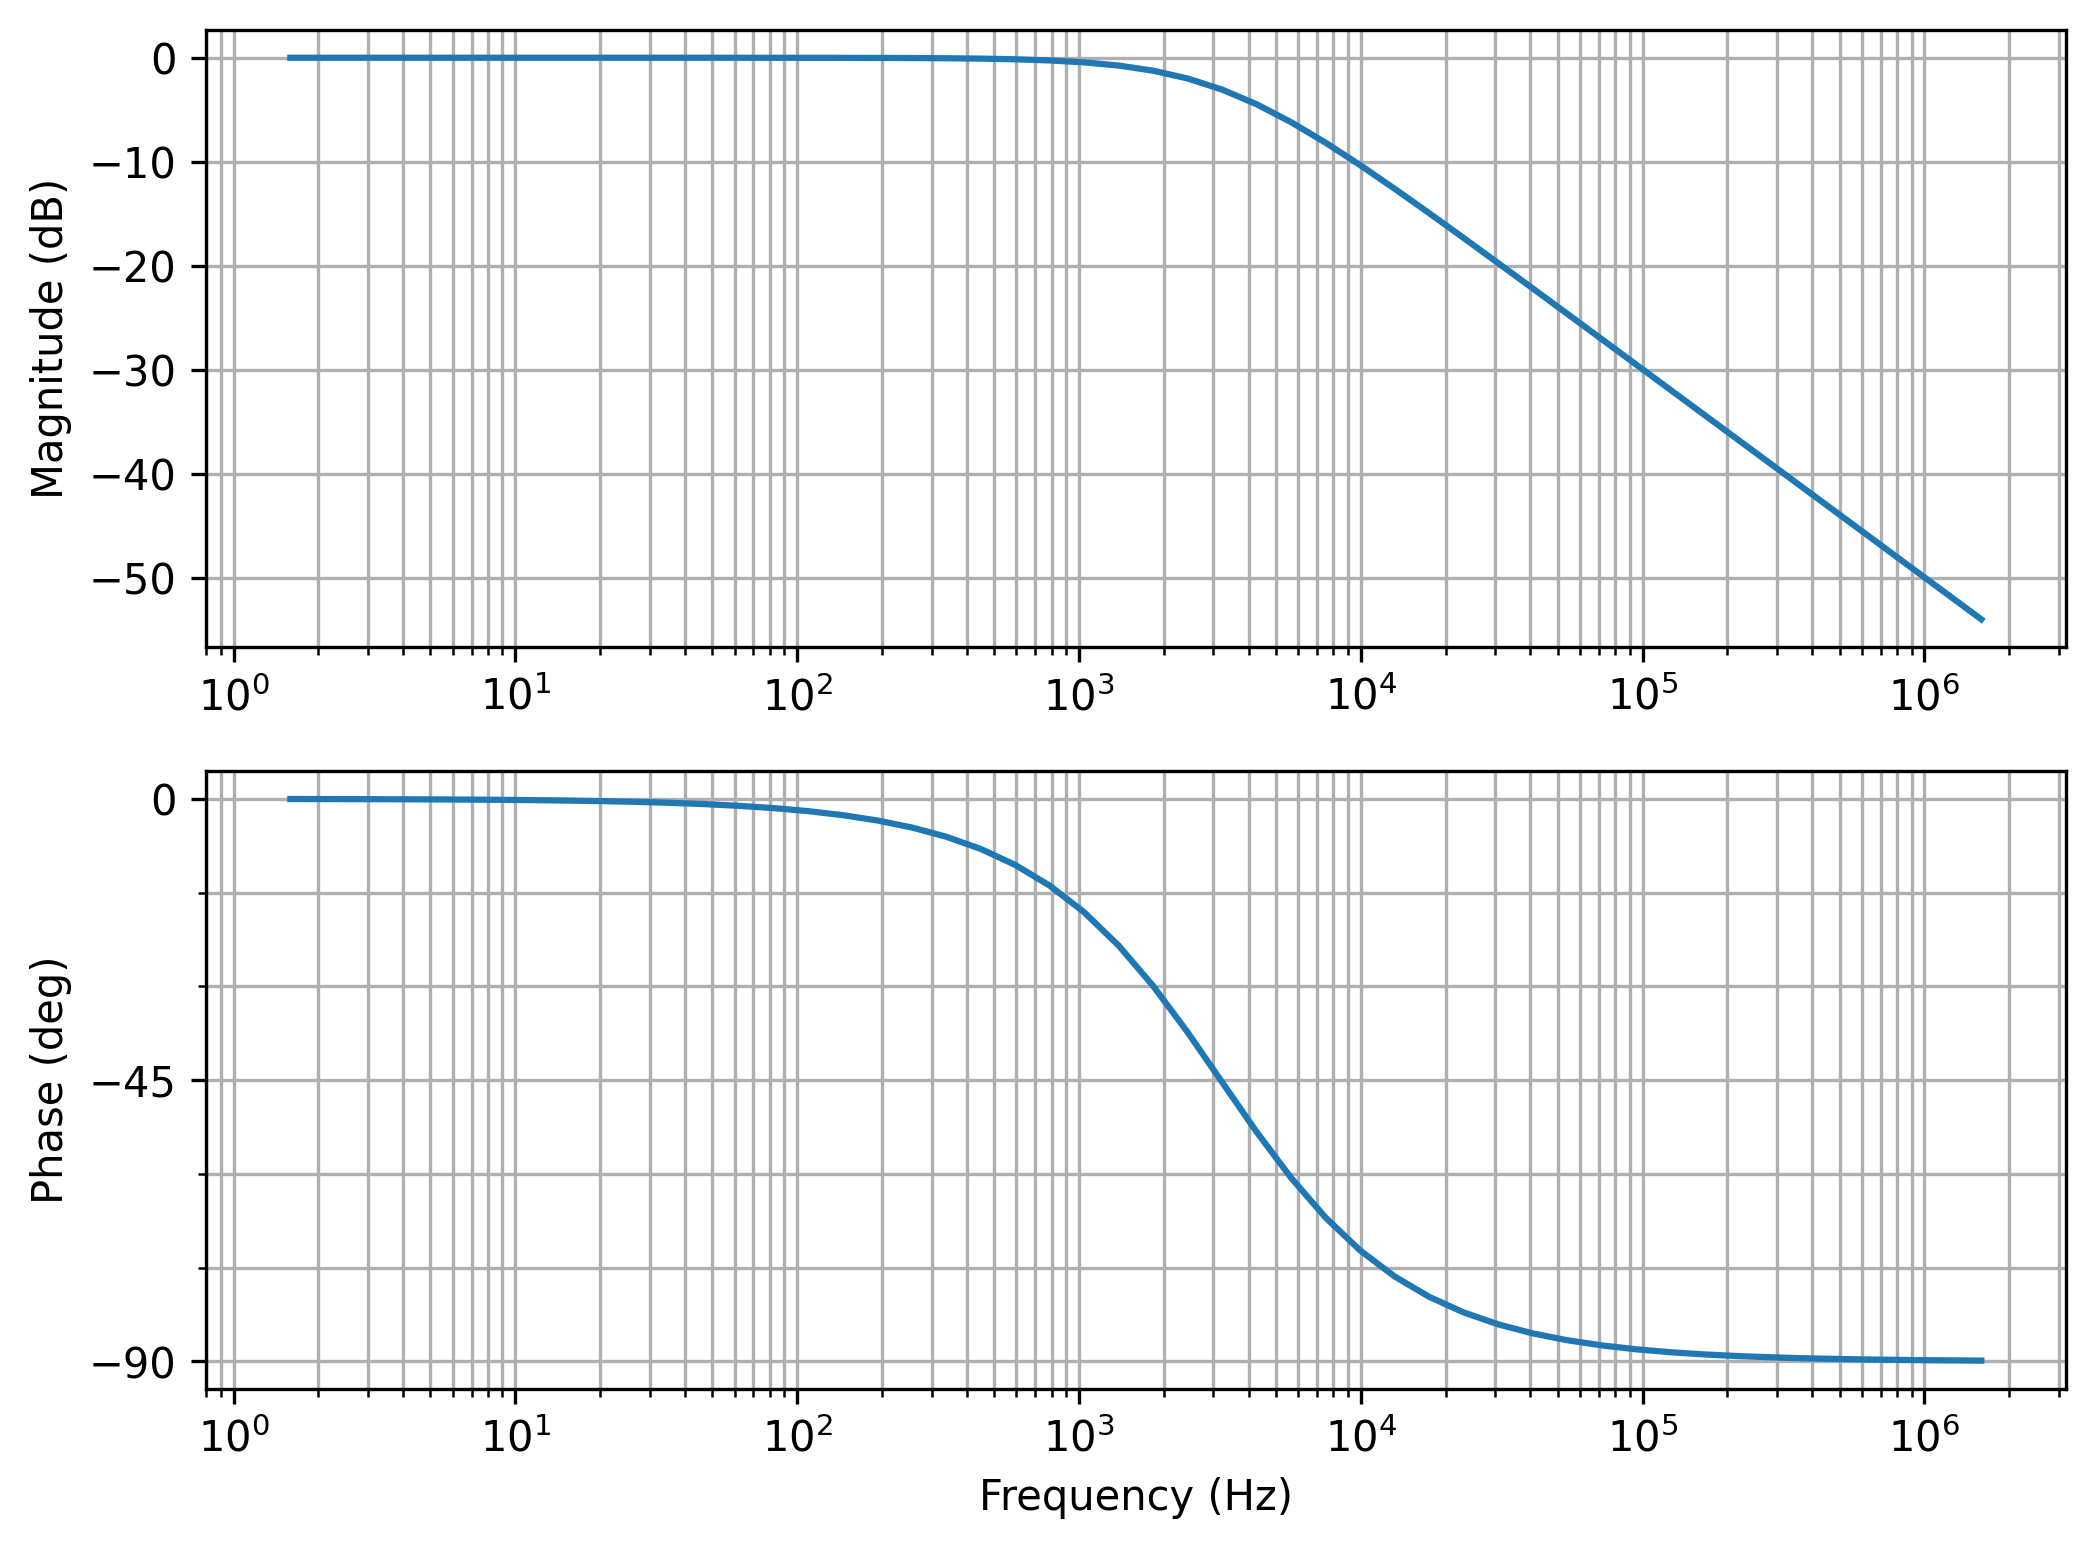

In [ ]:
# requires coefficients of the numerator and denominator polynomials
# the coefficients are given starting with the highest power of s
H = control.tf([1],[R*C,1])
w = np.logspace(1,7)
mag,phase,omega = control.bode(H,w,Hz=True,dB=True,deg=True)

In [ ]:
p = - np.arctan(0.08*np.pi/(1-(np.pi**2)*0.004))
#p = - np.arctan(0.06*np.pi)
print(rad2deg(p))

-14.663119948694035


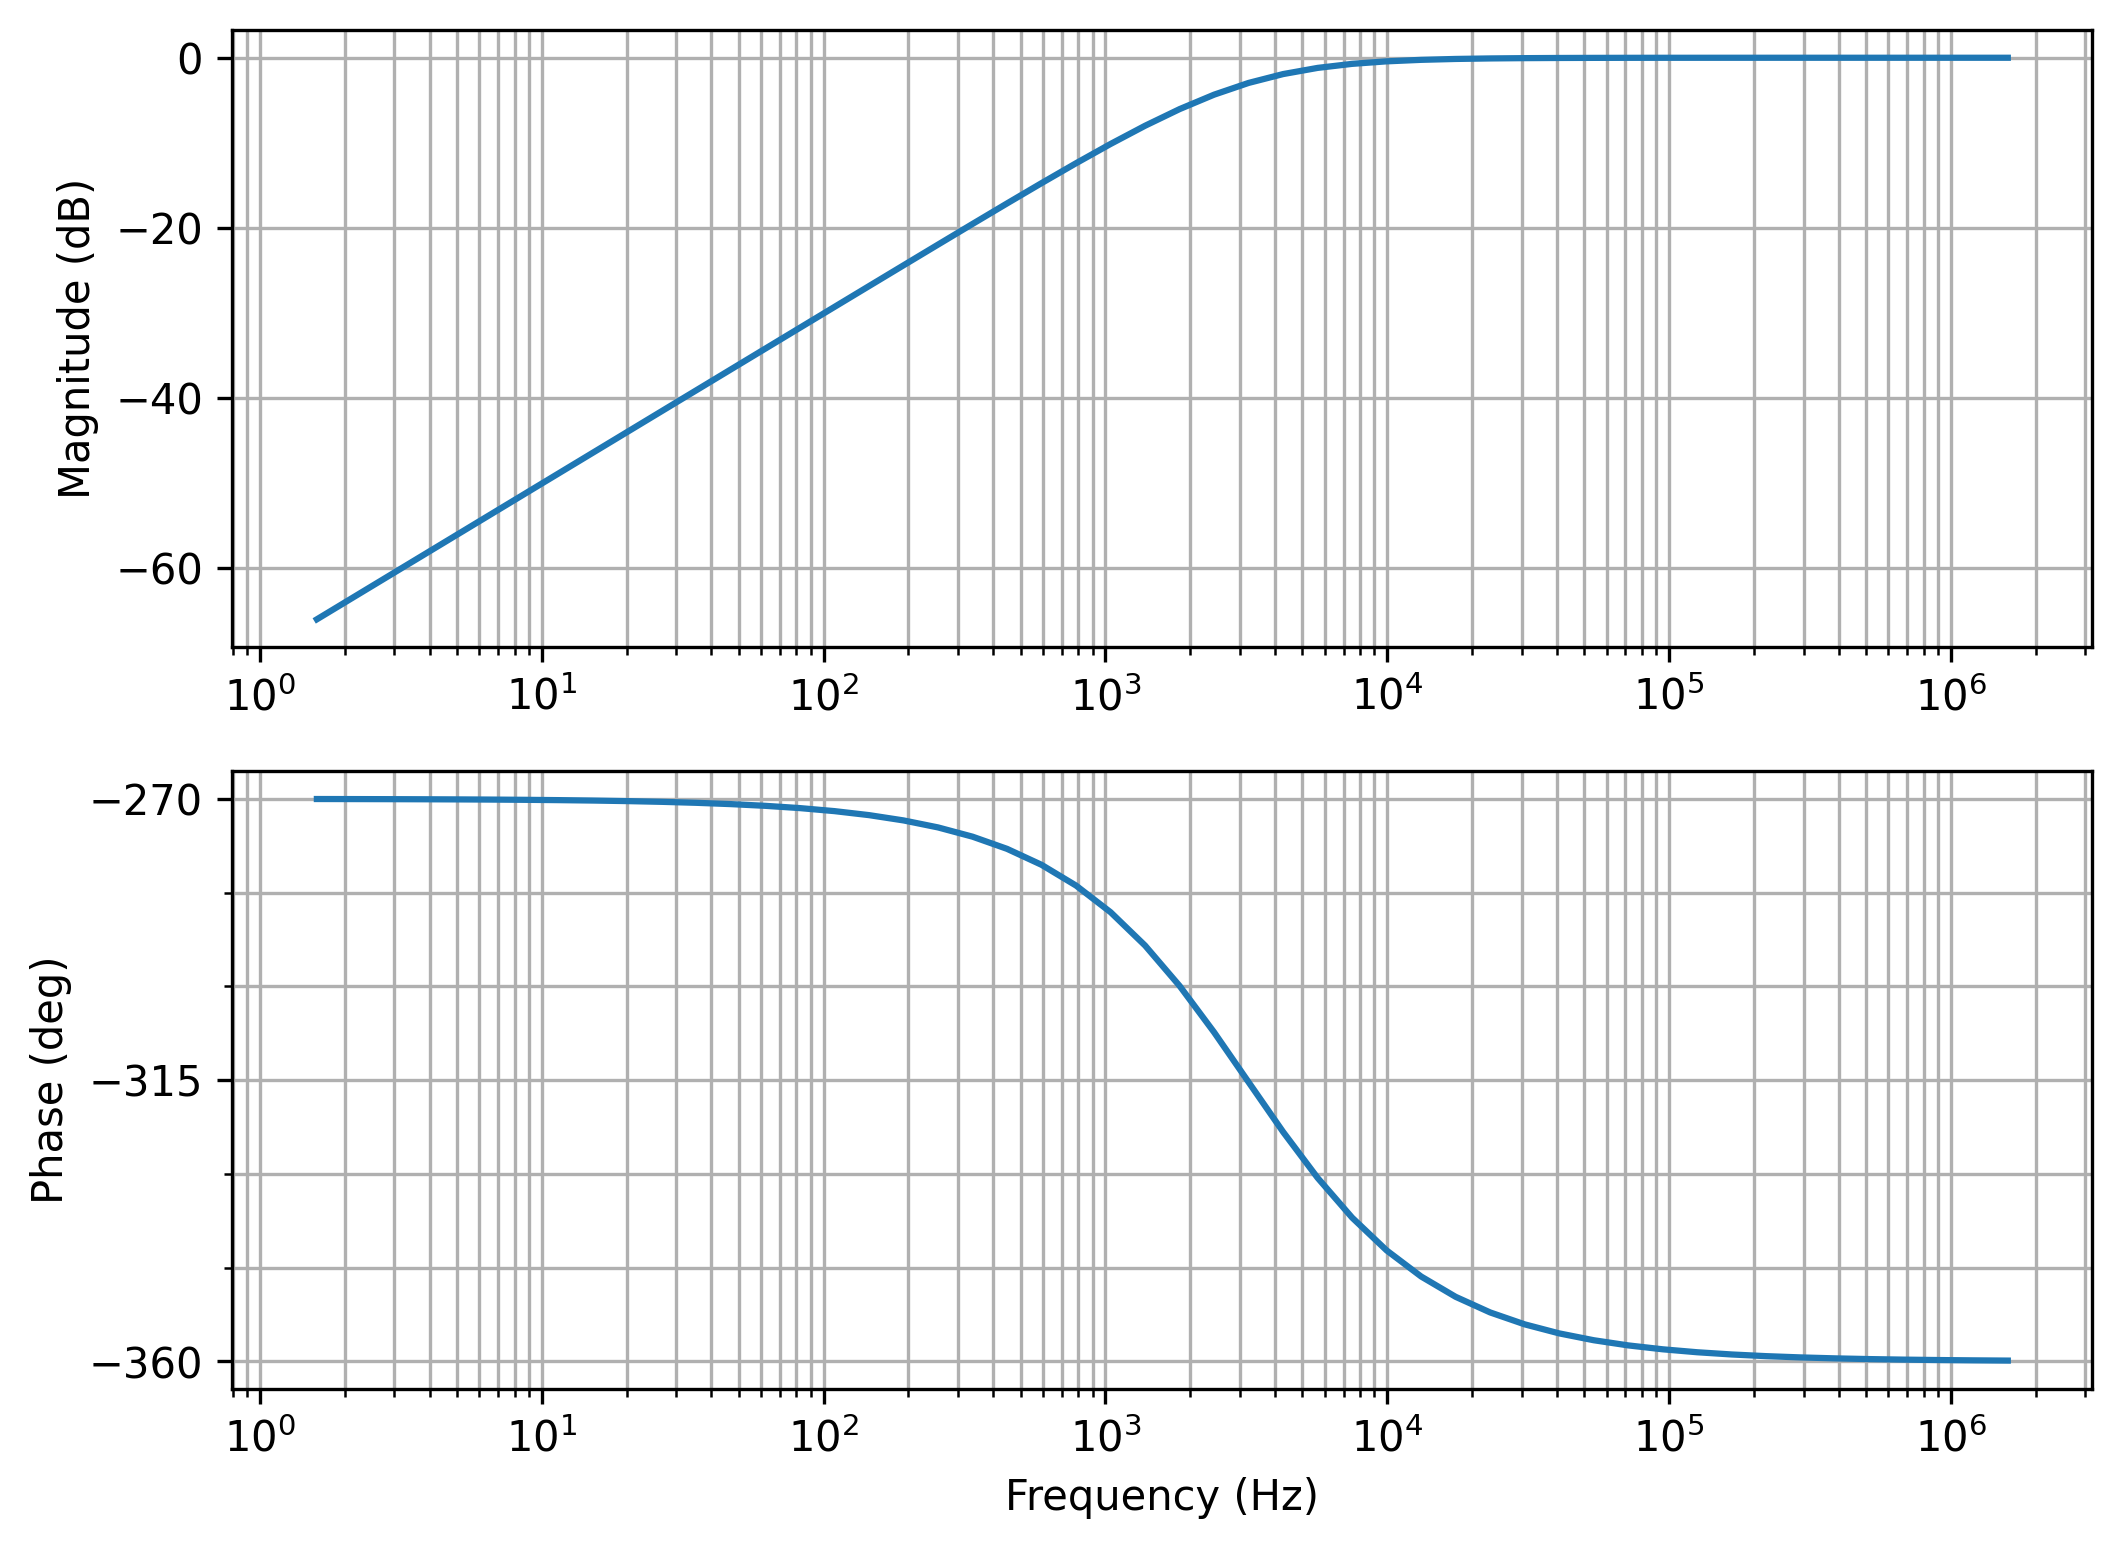

In [ ]:
# requires coefficients of the numerator and denominator polynomials
# the coefficients are given starting with the highest power of s
H = control.tf([R*C,0],[R*C,1])
w = np.logspace(1,7)
mag,phase,omega = control.bode(H,w,Hz=True,dB=True,deg=True)

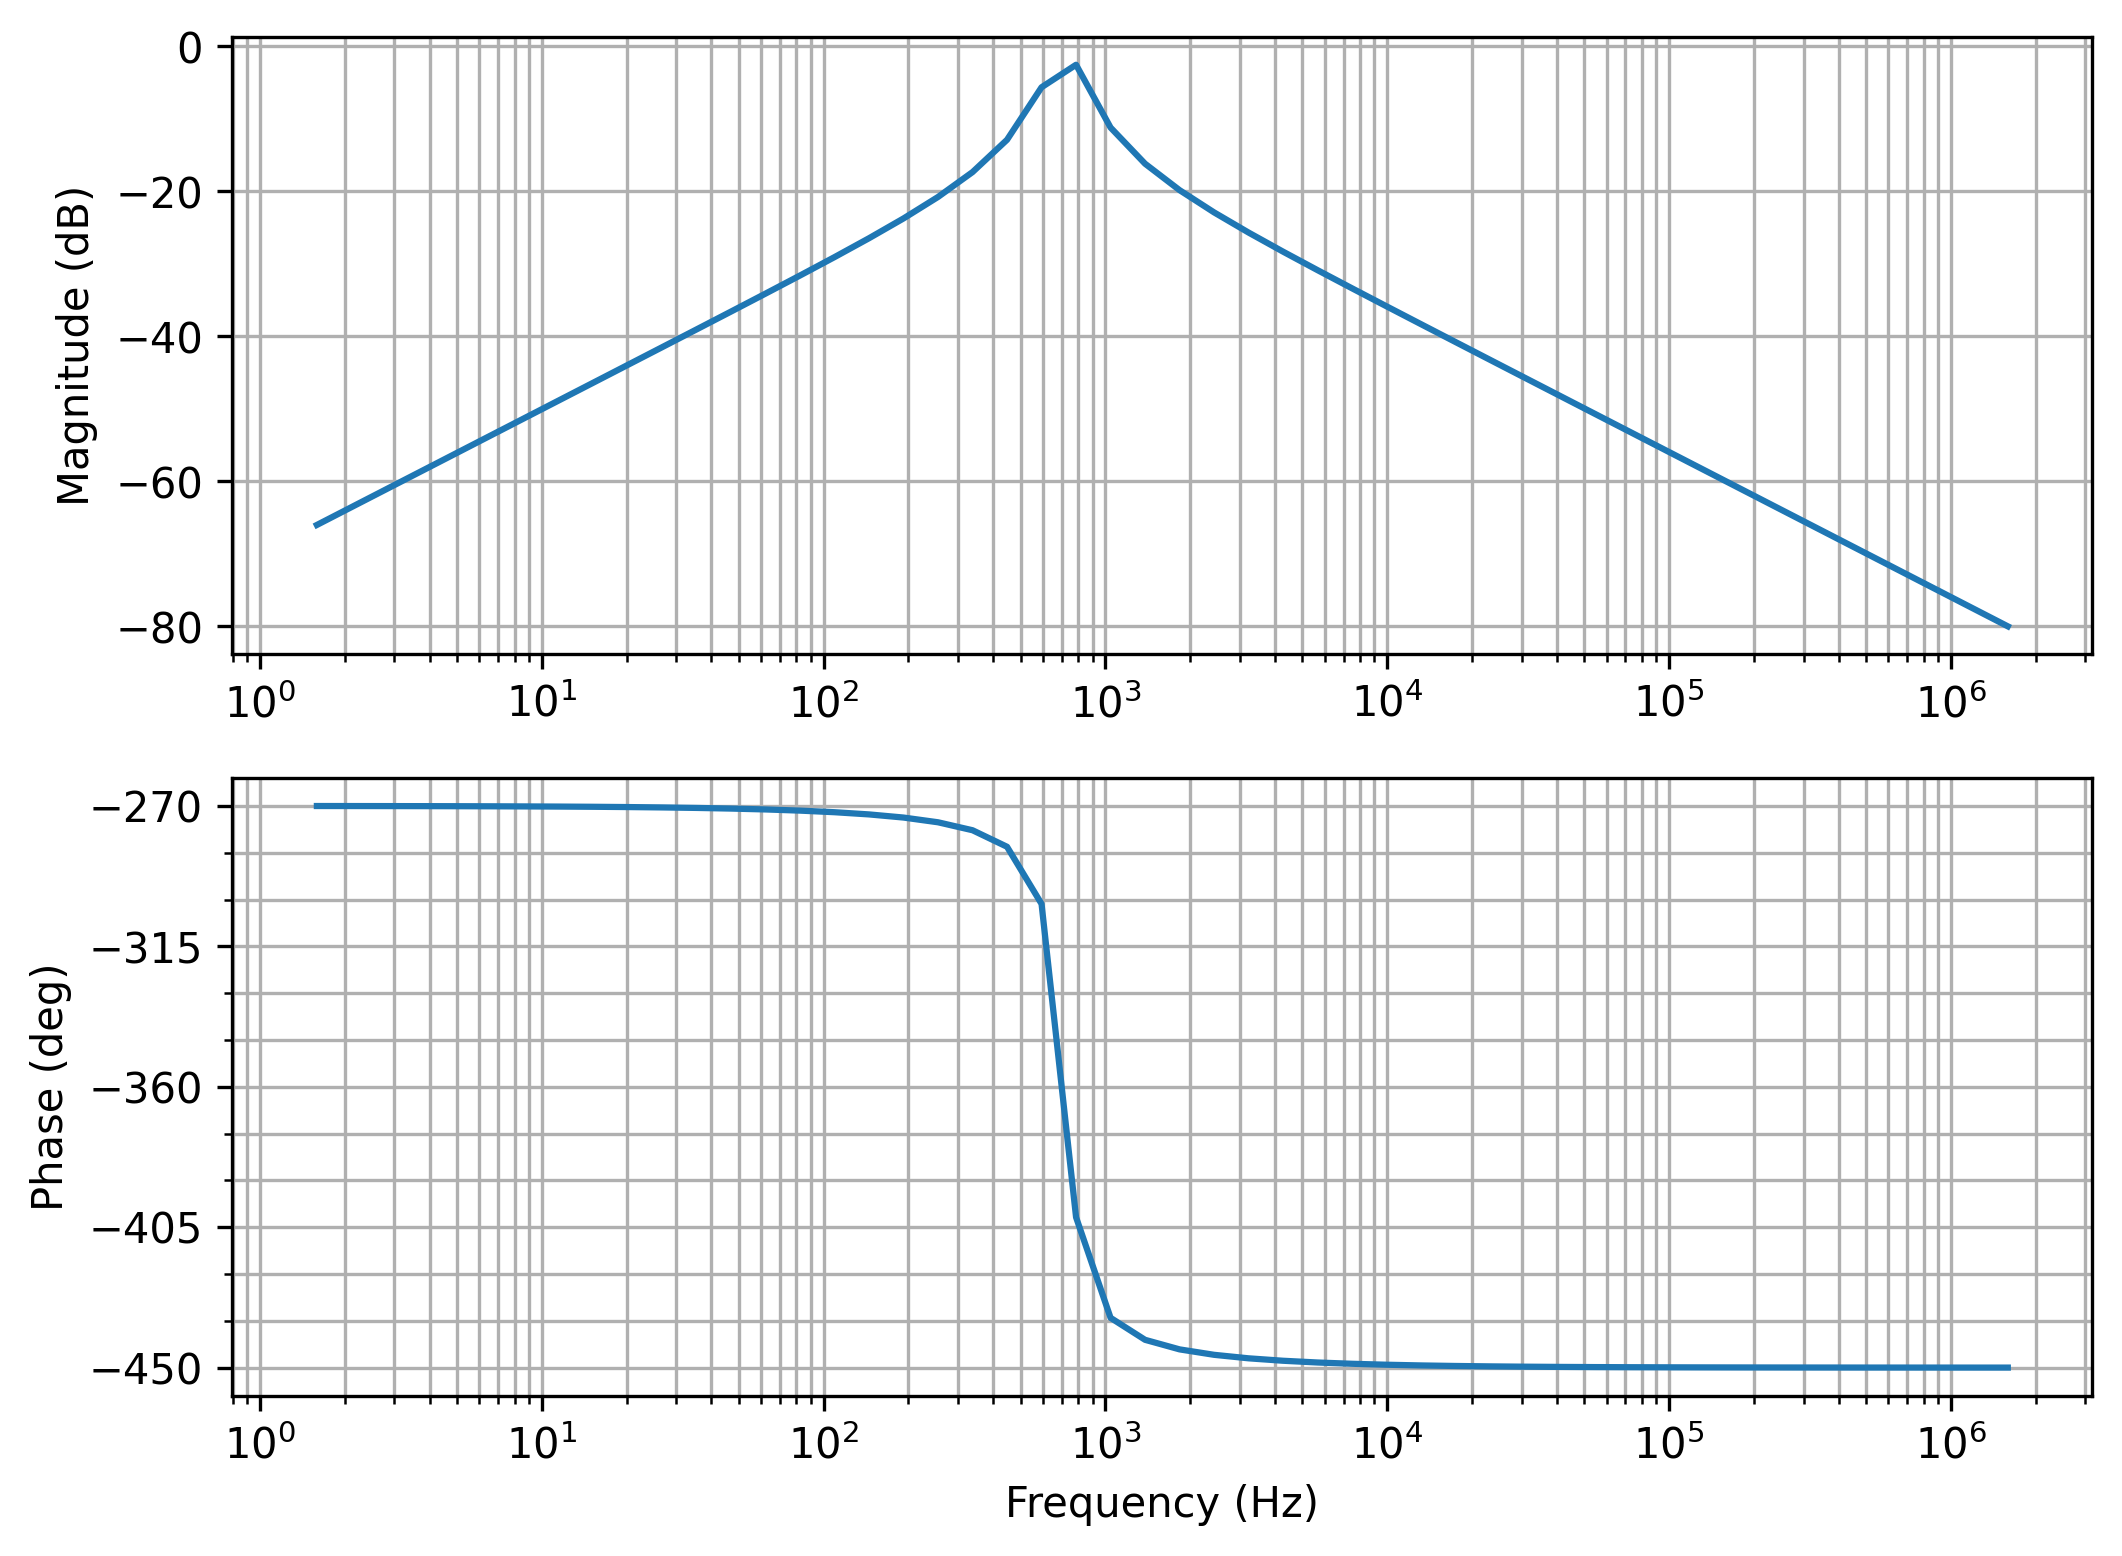

In [ ]:
# requires coefficients of the numerator and denominator polynomials
# the coefficients are given starting with the highest power of s
H = control.tf([R*C,0],[C,R*C,1])
w = np.logspace(1,7)
mag,phase,omega = control.bode(H,w,Hz=True,dB=True,deg=True)

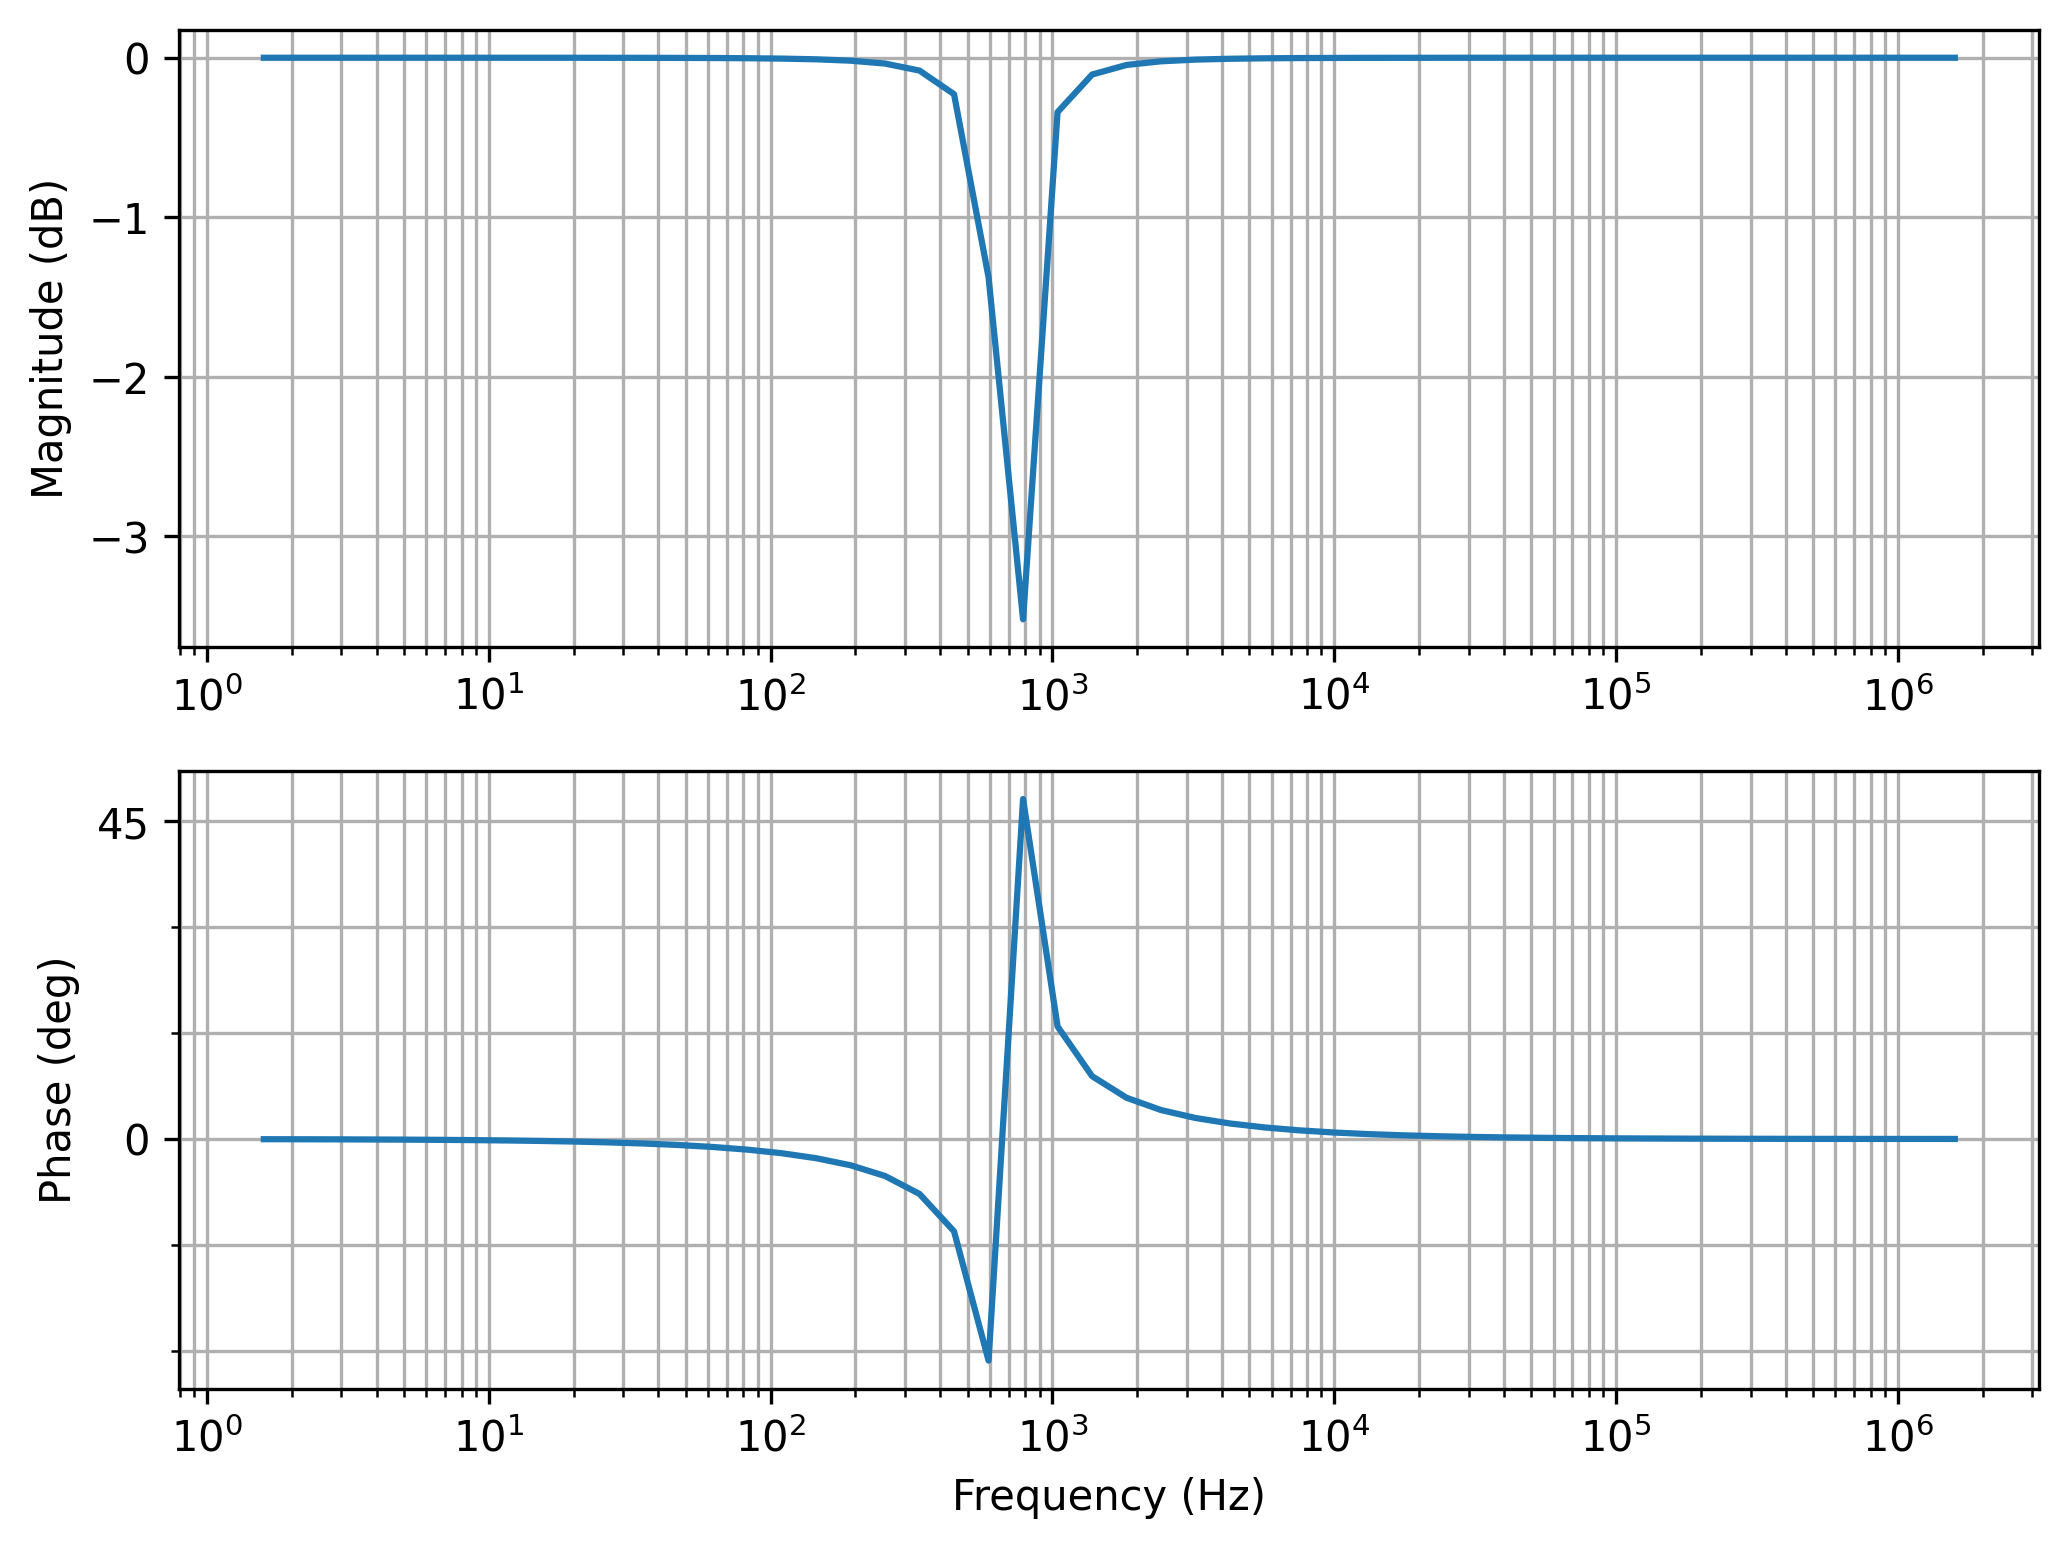

In [ ]:
# requires coefficients of the numerator and denominator polynomials
# the coefficients are given starting with the highest power of s
H = control.tf([C,0,1],[C,R*C,1])
w = np.logspace(1,7)
mag,phase,omega = control.bode(H,w,Hz=True,dB=True,deg=True)

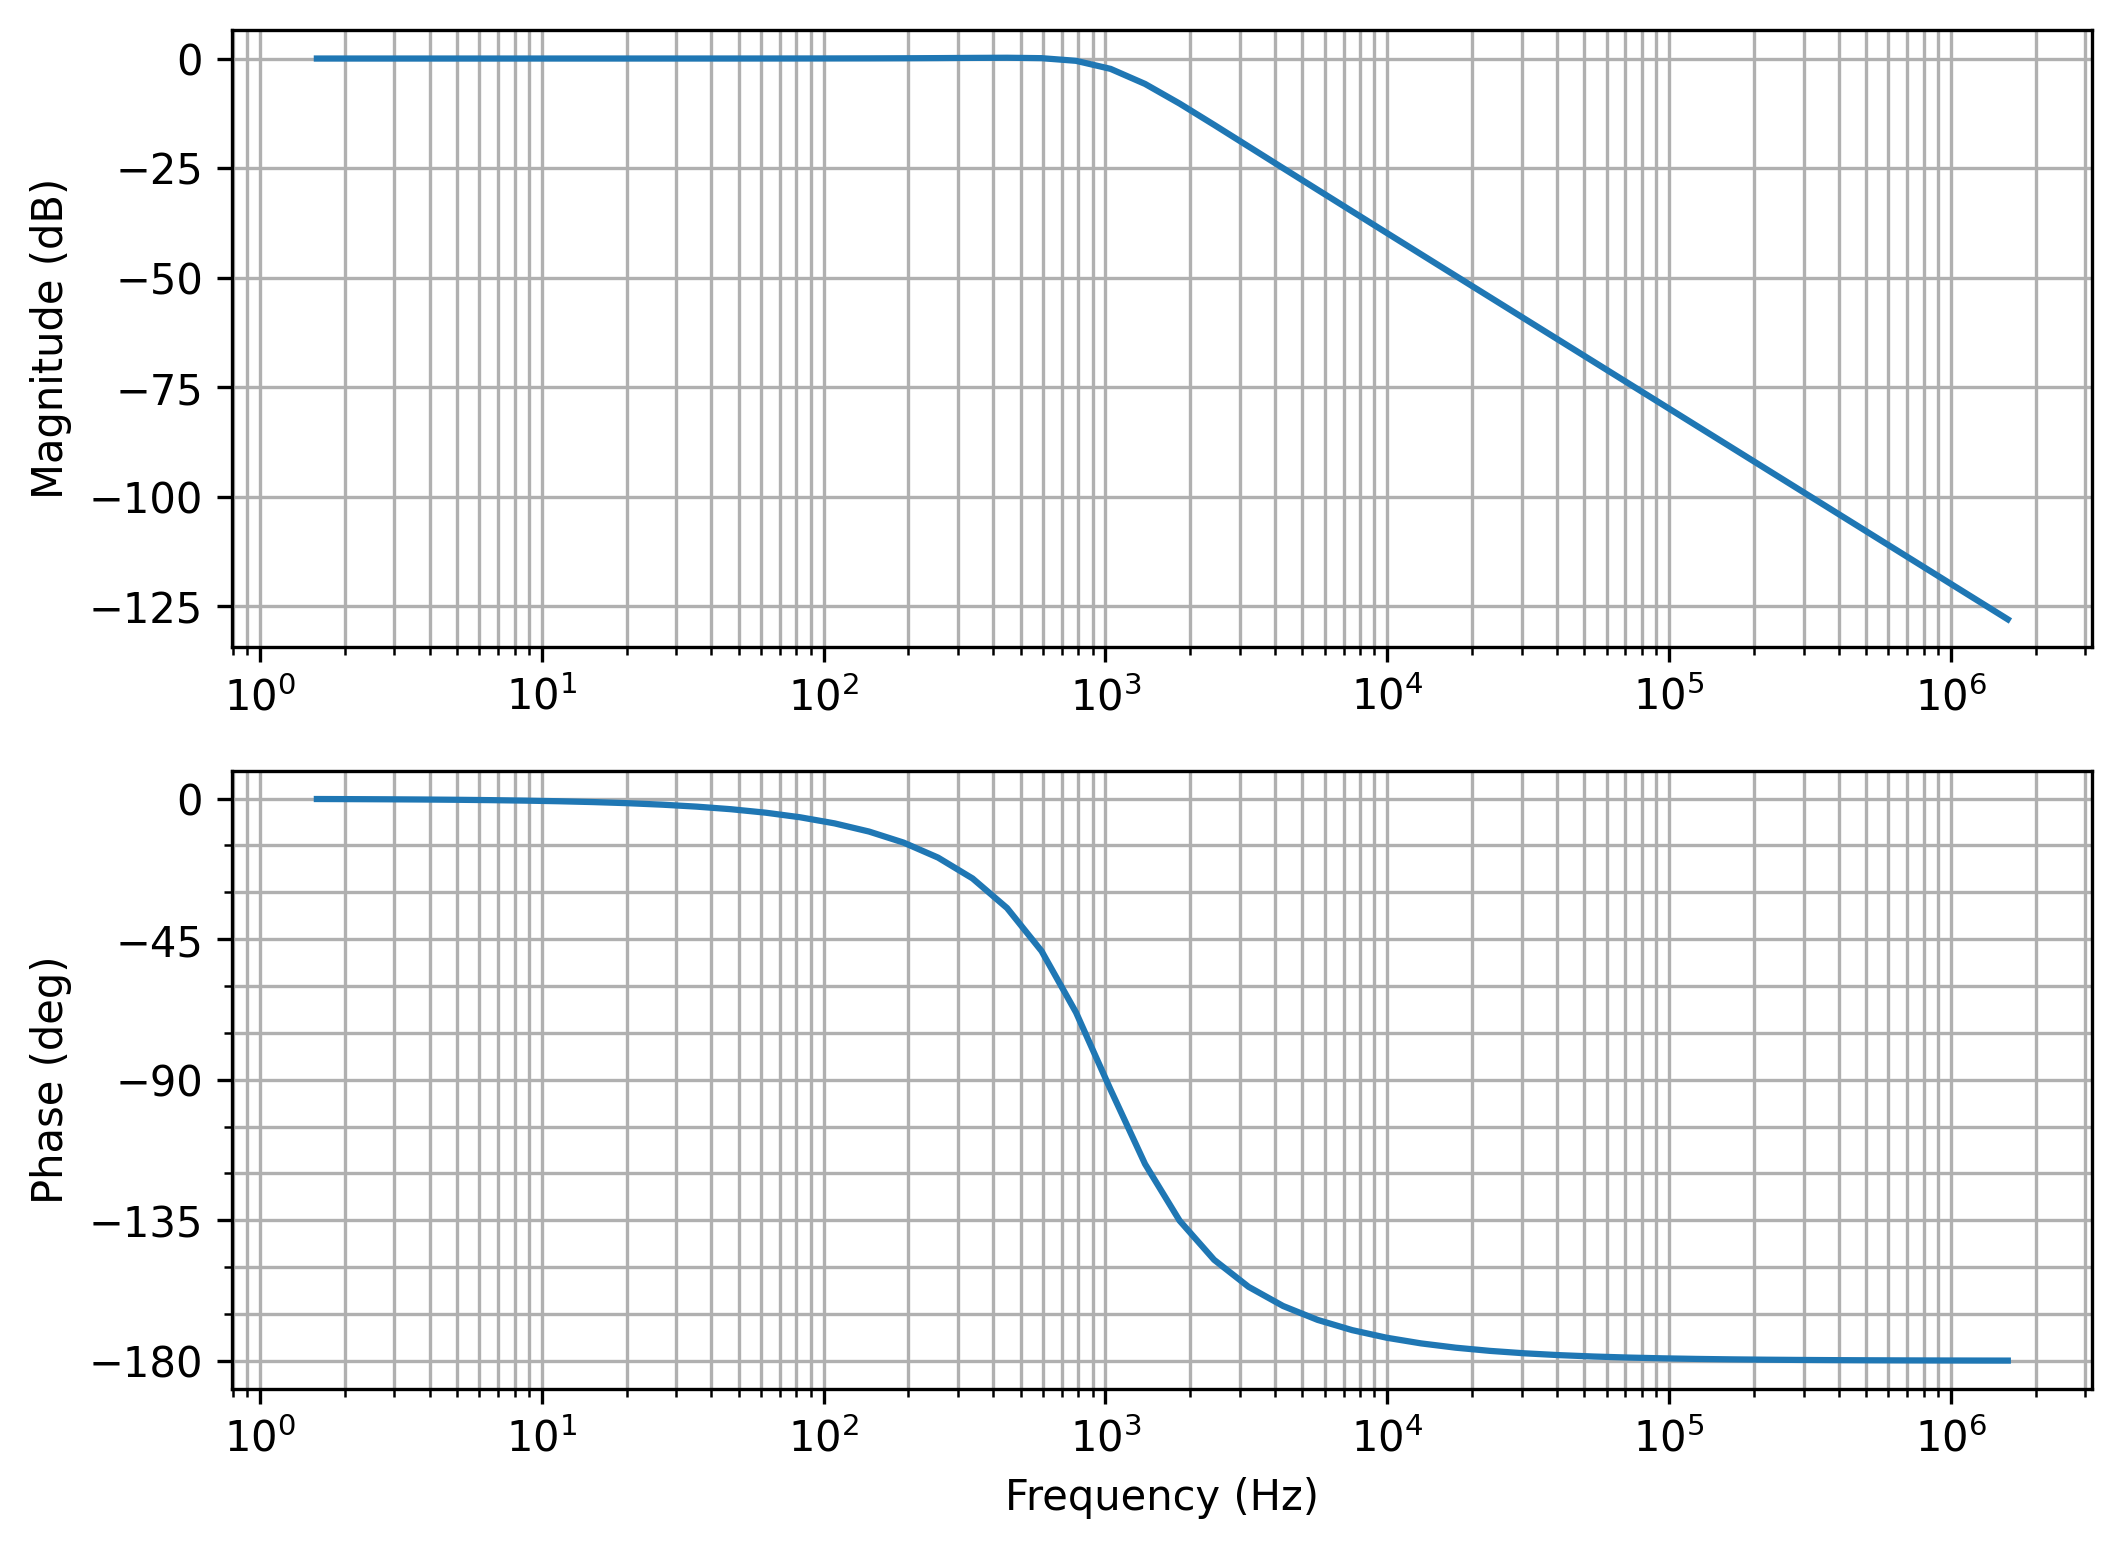

In [ ]:
#Sallen Key
R1 = 1e4
R2 = 1e4
C1 = 2.5e-8
C2 = 1e-8
H = control.tf([1],[R1*C1*R2*C2,(R1+R2)*C2,1])
w = np.logspace(1,7)
mag,phase,omega = control.bode(H,w,Hz=True,dB=True,deg=True)